# Procesado de Datos

Año 2000

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%run -i ../tools/functions.py
%run -i ../tools/label_encoder.py

Charge the file with the data, into a DataFrame

In [156]:
data_2000 = pd.read_csv("../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/SB11-20001-RGSTRO-CLFCCN-V1-0.txt", delimiter="|",
                        encoding="iso-8859-1")

/usr/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,12,14,15,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [157]:
data_2000.head(3).T

,0,1,2
ESTU_CONSECUTIVO,SB11200010000203,SB11200010000204,SB11200010000205
COLE_COD_ICFES,83048,3327,19364
COLE_NOMBRE_SEDE,INSTITUTO STUDIUM,COLEGIO HEBREO UNION,COLEGIO ANGLO COLOMBIANO
IND_ANNO_TERMINO_BACHILLERATO,1999,2000,2000
COLE_JORNADA,C,C,C
COLE_VALOR_PENSION,3,8,7
ESTU_GENERO,F,F,M
ESTU_NACIMIENTO_DIA,19,28,30
ESTU_NACIMIENTO_MES,3,4,4
ESTU_NACIMIENTO_ANNO,1981,1982,1982


In [158]:
data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index()

1      274
2     2744
3     8917
5    18814
6    11487
7     6493
8     3781
9     2208
@    19122
Name: FAMI_PERSONAS_HOGAR, dtype: int64

The simbol "@" will be changed for the number 4, because the average in Colombian's homes is near to 4.

In [159]:
data_2000 = letters_to_num(data_2000, ["@"], ["4"], "FAMI_PERSONAS_HOGAR")

Then, the following columns will be reviewed

In [160]:
data_2000['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index()

@        4
N    20144
S    53182
Name: FAMI_VIVIENDA_PROPIA, dtype: int64

There are very few rows with the value "@", so the rows that has it will be deleted. 

In [161]:
data_2000 = drop_lines(data_2000, "FAMI_VIVIENDA_PROPIA", "@")

In [162]:
data_2000['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index()

@        3
N    36147
S    11464
Name: FAMI_DEUDA_VIVIENDA, dtype: int64

In [163]:
data_2000 = drop_lines(data_2000, "FAMI_DEUDA_VIVIENDA", "@")

In [164]:
data_2000['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index()

@       35
N     2263
S    67423
Name: FAMI_LEE_ESCRIBE_PADRE, dtype: int64

In [165]:
data_2000 = drop_lines(data_2000, "FAMI_LEE_ESCRIBE_PADRE", "@")

In [166]:
data_2000['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index()

@       30
N     2847
S    71998
Name: FAMI_LEE_ESCRIBE_MADRE, dtype: int64

In [167]:
data_2000 = drop_lines(data_2000, "FAMI_LEE_ESCRIBE_MADRE", "@")

In [168]:
data_2000['FAMI_SOST_PERSONAL'].value_counts().sort_index()

@        3
N     6577
P    10337
T    57575
Name: FAMI_SOST_PERSONAL, dtype: int64

In [169]:
data_2000 = drop_lines(data_2000, "FAMI_SOST_PERSONAL", "@")

In [170]:
data_2000['ESTU_TRABAJA'].value_counts().sort_index()

@        2
N    63153
S    10608
Name: ESTU_TRABAJA, dtype: int64

In [171]:
data_2000 = drop_lines(data_2000, "ESTU_TRABAJA", "@")

In [172]:
data_2000['COLE_CALENDARIO'].value_counts().sort_index()

A     6697
B    49422
F    21430
Name: COLE_CALENDARIO, dtype: int64

In [173]:
data_2000['COLE_CARACTER'].value_counts().sort_index()

ACADEMICO              38189
ACADEMICO Y TECNICO    17827
NORMALISTA              1168
TECNICO                20365
Name: COLE_CARACTER, dtype: int64

In [174]:
remaining_c = data_2000.columns.difference(['FAMI_PERSONAS_HOGAR', 'FAMI_VIVIENDA_PROPIA', 'FAMI_DEUDA_VIVIENDA', 'FAMI_LEE_ESCRIBE_PADRE',
                     'FAMI_LEE_ESCRIBE_MADRE', 'FAMI_SOST_PERSONAL', 'ESTU_TRABAJA', 'COLE_CALENDARIO',
                     'COLE_CARACTER'])

In [175]:
remaining_c

Index(['COD_IDIOMA', 'COD_INTERDISCIPLINAR', 'COLE_BILINGUE', 'COLE_COD_ICFES',
       'COLE_DEPTO_UBICACION', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
       'COLE_NOMBRE_SEDE', 'COLE_VALOR_PENSION', 'ESTU_ACT_PROX_ANNO',
       'ESTU_CARRDESEADA_COD', 'ESTU_CARRDESEADA_RAZON', 'ESTU_CONSECUTIVO',
       'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'ESTU_IES_COD_DESEADA',
       'ESTU_LIMITA_INVIDENTE', 'ESTU_LIMITA_MOTRIZ',
       'ESTU_LIMITA_SORDOINTERPRETE', 'ESTU_LIMITA_SORDONOINTERPRETE',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_NACIMIENTO_ANNO',
       'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_MES', 'ESTU_RAZONINSTITUTO',
       'ESTU_RESIDE_DEPTO', 'ESTU_RESIDE_MCPIO', 'ESTU_TIPO_DOCUMENTO',
       'FAMI_APORTANTES', 'FAMI_EDUCA_MADRE', 'FAMI_EDUCA_PADRE',
       'FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_NUM_HERMANOS',
       'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'FAMI_OCUPA_MADRE', 'FAMI_OCUPA_PADRE',
       'FAMI_POSICION_HERMANOS', 'IND_ANNO_TERMINO_BACHILLERATO',
       'PUNT_BIOLOGIA', '

Columnas:
- COD_IDIOMA: BIEN, int64
- COD_INTERDISCIPLINAR: Bien, int64
- COLE_BILINGUE: Bien, float64
- COLE_COD_ICFES: Bien, int64
- COLE_DEPTO_UBICACION: Bien, **OBJECT**
- COLE_JORNADA: Bien, **OBJECT**
- COLE_MCPIO_UBICACION: Bien, **OBJECT**
- COLE_NOMBRE_SEDE: Bien, **OBJECT**
- COLE_VALOR_PENSION: existen VALORES NaN, str **REVISAR**
- ESTU_ACT_PROX_ANNO: existen @ que se cambiaron por el valor 4 que falta, **OBJECT**
- ESTU_CARRDESEADA_RAZON: existen valores NaN, str **REVISAR**
- ESTU_DEPTO_PRESENTACION: Bien, **OBJECT**
- ESTU_GENERO: Bien, **OBJECT**
- ESTU_LIMITA_INVIDENTE: Bien, **OBJECT**, Muchos valores NaN
- ESTU_LIMITA_MOTRIZ: Bien, **OBJECT**, Muchos valores NaN
- ESTU_LIMITA_SORDONOINTERPRETE: Bien, **OBJECT**, Muchos valores NaN
- ESTU_MCPIO_PRESENTACION: Bien, **OBJECT**
- ESTU_NACIMIENTO_ANNO: Bien, Float64, Se eliminaron algunas filas porque no tenian logica (años 195, 196, 197, 198)
- ESTU_NACIMIENTO_DIA: Bien, Float64
- ESTU_NACIMIENTO_MES: Bien, Float64
- ESTU_RAZONINSTITUTO: Valores 'nan', ***REVISAR***
- ESTU_RESIDE_DEPTO: Bien, **OBJECT**
- ESTU_RESIDE_MCPIO: Bien, **OBJECT**
- ESTU_TIPO_DOCUMENTO: Bien, **OBJECT**
- FAMI_APORTANTES: Bien, **OBJECT**, se eliminan las filas que poseen '@' y se cambia el '+' por '+9'
- FAMI_EDUCA_MADRE: Bien, **OBJECT**, se eliminan las filas que poseen '@'
- FAMI_EDUCA_PADRE: Bien, **OBJECT**, se eliminan las filas que poseen '@'
- FAMI_INGRESO_FMILIAR_MENSUAL: Bien, **OBJECT**, se eliminan las filas que poseen '@'
- FAMI_NUM_HERMANOS: Bien, **OBJECT**, se eliminan las filas que poseen '@' y se cambia el '+' por '+10'
- FAMI_NUM_HERMANOS_EDUSUPERIOR: Bien, **OBJECT**, se eliminan las filas que poseen '@' y se cambia el + por '+10'
- FAMI_OCUPA_MADRE: Bien, **OBJECT** se eliminan las filas que poseen '@'
- FAMI_OCUPA_PADRE: Bien, **OBJECT** se eliminan las filas que poseen '@'
- FAMI_POSICION_HERMANOS: Bien **OBJECT**, se eliminan las filas que poseen '@' y se cambia el '+' por '+10'
- PUNT_BIOLOGIA: Bien, **OBJECT**
- PUNT_FILOSOFIA: Bien, **OBJECT**
- PUNT_FISICA: Bien, **OBJECT**
- PUNT_GEOGRAFIA: Bien, **OBJECT**
- PUNT_HISTORIA: Bien, **OBJECT**
- PUNT_IDIOMA: Bien, **OBJECT**
- PUNT_INTERDISCIPLINAR: Bien, **OBJECT**
- PUNT_LENGUAJE: Bien, **OBJECT**
- PUNT_MATEMATICAS: Bien, **OBJECT**
- PUNT_QUIMICA: Bien, **OBJECT**
___________________

ELIMINACIONES

- ESTU_CONSECUTIVO: Eliminada. no aporta para la prediccion ***ELIMINADA***
- ESTU_CARRDESEADA_COD: Datos con errores y demasiadas inconsistencias, ***ELIMINADA***
- ESTU_IES_COD_DESEADA: Datos con errores y demasiadas inconsistencias, ***ELIMINADA***
- ESTU_LIMITA_SORDOINTERPRETE: No tiene valores en ninguna fila, ***ELIMINADA***
- IND_ANNO_TERMINO_BACHILLERATO: Datos con errores y demasiadas inconsistencias. ***ELIMINADA***

Cambio de la @ por 4 en la columna *ESTU_ACT_PROX_ANNO*

In [176]:
data_2000['ESTU_ACT_PROX_ANNO'].value_counts().sort_index()

1    19311
2     1913
3    55853
@       44
Name: ESTU_ACT_PROX_ANNO, dtype: int64

In [177]:
data_2000['ESTU_ACT_PROX_ANNO'] = data_2000['ESTU_ACT_PROX_ANNO'].replace('@', '4')

Se eliminan las lineas que tienen años invalidos

In [178]:
data_2000 = drop_lines(data_2000, 'ESTU_NACIMIENTO_ANNO', 195.0)
data_2000 = drop_lines(data_2000, 'ESTU_NACIMIENTO_ANNO', 196.0)
data_2000 = drop_lines(data_2000, 'ESTU_NACIMIENTO_ANNO', 197.0)
data_2000 = drop_lines(data_2000, 'ESTU_NACIMIENTO_ANNO', 198.0)

Se hacen los cambios segun la columna FAMI_APORTANTES

In [179]:
data_2000 = drop_lines(data_2000, 'FAMI_APORTANTES', '@')

In [180]:
data_2000['FAMI_APORTANTES'] = data_2000['FAMI_APORTANTES'].replace('+', '+9')

Se eliminan las filas que poseen '@' FAMI_EDUCA_MADRE

In [181]:
data_2000 = drop_lines(data_2000, 'FAMI_EDUCA_MADRE', '@')

Se eliminan las filas que poseen '@' en FAMI_EDUCA_PADRE

In [182]:
data_2000 = drop_lines(data_2000, 'FAMI_EDUCA_PADRE', '@')

Se eliminan las filas que poseen '@' en FAMI_INGRESO_FMILIAR_MENSUAL

In [183]:
data_2000 = drop_lines(data_2000, 'FAMI_INGRESO_FMILIAR_MENSUAL', '@')

Se eliminan las filas que poseen '@' y se cambia el '+' por '+10' en FAMI_NUM_HERMANOS

In [184]:
data_2000 = drop_lines(data_2000, 'FAMI_NUM_HERMANOS', '@')
data_2000['FAMI_NUM_HERMANOS'] = data_2000['FAMI_NUM_HERMANOS'].replace('+', '+10')

In [185]:
#lo mismo que la anterior pero en FAMI_NUM_HERMANOS_EDUSUPERIOR
data_2000 = drop_lines(data_2000, 'FAMI_NUM_HERMANOS_EDUSUPERIOR', '@')
data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('+', '+10')

In [186]:
#se eliminan las filas que poseen el valor '@'
data_2000 = drop_lines(data_2000, 'FAMI_OCUPA_MADRE', '@')

In [187]:
#se eliminan las filas que poseen el valor '@'
data_2000 = drop_lines(data_2000, 'FAMI_OCUPA_PADRE', '@')

In [188]:
#Se eliminan las filas que tienen valores '@' y se cambia '+' por '+10'
data_2000 = drop_lines(data_2000, 'FAMI_POSICION_HERMANOS', '@')
data_2000['FAMI_POSICION_HERMANOS'] = data_2000['FAMI_POSICION_HERMANOS'].replace('+', '+10')

Deletion of the selected columns

In [189]:
data_2000 = data_2000.drop(['ESTU_CARRDESEADA_COD', 'ESTU_IES_COD_DESEADA', 'ESTU_LIMITA_SORDOINTERPRETE',
 'IND_ANNO_TERMINO_BACHILLERATO'], axis=1)

___________

___________

___________

# En este momento ya estaria listo el primer archivo, para su posterior uso en un modelo de prediccion

In [36]:
from sklearn.linear_model import LinearRegression

In [190]:
LR = LinearRegression()

The data will be prepared to be splitted into **X** and **y**  

The first step is encode the data. The result will be stored in a new DataFram called ***encoded_data***

In [191]:
encoded_data = pd.DataFrame.copy(data_2000)

In [192]:
encoded_data = label_encoder(encoded_data)

But, this function just modified the columns that has dtype = object, so i have to check the other columns. 
The COLE_BILINGUE column, is a Float64 dtype and the function doesn't affected it.  
The solution is replace the NaN values found in the column and changes it for the "0" to indicate that the school is not Bilingual.

In [194]:
"""Now i fix the problem with the COLE_BILINGUE"""
encoded_data = letters_to_num(encoded_data, "NaN", "0", "COLE_BILINGUE")
data_2000 = letters_to_num(data_2000, 'NaN', '0', 'COLE_BILINGUE')

So now, using the function ***missing_data*** located in the file called ***functions.py***, we can check the whole DataFrame to discover another columns with NaN values

In [196]:
missing_data(encoded_data)

Elementos null/NaN ESTU_CONSECUTIVO                  0
COLE_COD_ICFES                    0
COLE_NOMBRE_SEDE                  0
COLE_JORNADA                      0
COLE_VALOR_PENSION                0
ESTU_GENERO                       0
ESTU_NACIMIENTO_DIA              18
ESTU_NACIMIENTO_MES              18
ESTU_NACIMIENTO_ANNO             19
ESTU_DEPTO_PRESENTACION           0
ESTU_MCPIO_PRESENTACION           0
ESTU_LIMITA_INVIDENTE             0
ESTU_LIMITA_SORDONOINTERPRETE     0
ESTU_LIMITA_MOTRIZ                0
PUNT_BIOLOGIA                     0
PUNT_MATEMATICAS                  0
PUNT_FILOSOFIA                    0
PUNT_FISICA                       0
PUNT_HISTORIA                     0
PUNT_QUIMICA                      0
PUNT_LENGUAJE                     0
PUNT_GEOGRAFIA                    0
COD_INTERDISCIPLINAR              0
PUNT_INTERDISCIPLINAR             0
COD_IDIOMA                        0
PUNT_IDIOMA                       0
ESTU_RAZONINSTITUTO               0
ESTU_CARR

The NaN values are located in the columns related to the student's birth date.  
And one important thing we can see in the result is that when one column is NaN the other two column are NaN too, so we can delete this 14 columns with not so much troubles.  
I just found one exception in the row number 55189, that just the Year is NaN.  
BUT i have to delete this in the encoded DataFrame ***encoded_data*** to split the data and avoid some troubles that can appear.  

In [143]:
encoded_data.loc[encoded_data['ESTU_NACIMIENTO_ANNO'].isnull()]
#ESTU_NACIMIENTO_MES
#ESTU_NACIMIENTO_ANNO

,ESTU_CONSECUTIVO,COLE_COD_ICFES,COLE_NOMBRE_SEDE,COLE_JORNADA,COLE_VALOR_PENSION,ESTU_GENERO,ESTU_NACIMIENTO_DIA,ESTU_NACIMIENTO_MES,ESTU_NACIMIENTO_ANNO,ESTU_DEPTO_PRESENTACION,...,ESTU_TRABAJA,ESTU_ACT_PROX_ANNO,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_MCPIO_UBICACION,ESTU_TIPO_DOCUMENTO,ESTU_RESIDE_DEPTO,ESTU_RESIDE_MCPIO
7061,6716,11528,956,0,-1,0,NaN,NaN,NaN,19,...,-1,-1,1,2,2,18,22,6,19,30
8246,7846,19349,183,0,-1,1,NaN,NaN,NaN,3,...,-1,-1,1,1,1,3,30,0,3,38
9836,9363,29181,358,0,-1,1,NaN,NaN,NaN,19,...,-1,-1,1,2,0,18,100,2,19,127
9953,9474,19349,183,0,-1,0,NaN,NaN,NaN,3,...,-1,-1,1,1,1,3,30,0,3,38
11201,10660,11338,854,0,-1,1,NaN,NaN,NaN,19,...,-1,-1,1,2,1,18,153,2,19,196
11212,10671,11338,854,0,-1,0,NaN,NaN,NaN,19,...,-1,-1,1,2,1,18,153,6,19,196
11978,11398,80663,33,0,-1,1,NaN,NaN,NaN,2,...,-1,-1,2,2,1,2,25,0,2,33
13453,12800,88823,1004,0,-1,0,NaN,NaN,NaN,13,...,-1,-1,2,2,0,13,98,0,13,125
20101,19090,48488,1222,1,-1,1,NaN,NaN,NaN,9,...,-1,-1,0,2,1,9,163,6,9,209
23303,22143,11973,588,1,-1,0,NaN,NaN,NaN,19,...,-1,-1,1,2,0,18,230,6,19,300


In [197]:
"""First i have to put the NaN values as a Number because of the column's dtype"""
encoded_data = letters_to_num(encoded_data, "NaN", "-1", "ESTU_NACIMIENTO_ANNO")
data_2000 = letters_to_num(data_2000, 'NaN', '-1', 'ESTU_NACIMIENTO_ANNO')

In [199]:
"""Then i can delete the lines"""
encoded_data = drop_lines(encoded_data, 'ESTU_NACIMIENTO_ANNO', '-1')
data_2000 = drop_lines(data_2000, 'ESTU_NACIMIENTO_ANNO', '-1')

**Now it's time for a little test with sklearn linear regression**

Now it's time to exclude columns that do not serve us for our objective as the student's consecutive.  
- COLE_COD_ICFES
- COLE_NOMBRE_SEDE
- ESTU_TIPO_DOCUMENTO  

Also the data is divided for train [0, 50000] and for test [50000,73551].

In [201]:
print("Shape of the original DF:", data_2000.shape)
print("Shape of the encoded DF:", encoded_data.shape)

Shape of the original DF: (73551, 53)
Shape of the encoded DF: (73551, 53)


In [204]:
y = data_2000.filter(items = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA',
                     'PUNT_QUIMICA', 'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_IDIOMA', 'PUNT_INTERDISCIPLINAR'], axis=1)
print(y.shape)

(73551, 10)


So, Now I have a DataFrame with all the posible targets that will be taken into account for the work

In [205]:
"""I split the data into X_train and y_train, taking just the corresponding columns"""
X_train = encoded_data.loc[:50000, 'COLE_COD_ICFES':]
y_train = y.loc[:50000, 'PUNT_MATEMATICAS'] #i take the score in Maths
###########################################################################################
"""Now, i delete the columns that are not useful to the work"""
X_train = X_train.drop(['COLE_COD_ICFES', 'COLE_NOMBRE_SEDE', 'ESTU_TIPO_DOCUMENTO'], axis=1)
"""Now it's time to drop the others subject's scores, because this is what i want to predict"""
X_train = X_train.drop(['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 
                        'PUNT_HISTORIA', 'PUNT_QUIMICA', 'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_IDIOMA',
                        'PUNT_INTERDISCIPLINAR'], axis=1)

In [208]:
print(data_2000.shape, encoded_data.shape)

(73551, 53) (73551, 53)


First try to predict one subject score

In [207]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now i can prepare the Data to test the model

In [209]:
"""I split the data into X_test and y_test, taking just the corresponding columns"""
X_test = encoded_data.loc[50000:, 'COLE_COD_ICFES':]
y_test = y.loc[50000:, 'PUNT_MATEMATICAS'] #i take the score in Maths
"""Now, i delete the columns that are not useful to the work"""
X_test = X_test.drop(['COLE_COD_ICFES', 'COLE_NOMBRE_SEDE', 'ESTU_TIPO_DOCUMENTO'], axis=1)
"""Now it's time to drop the others subject's scores, because this is what i want to predict"""
X_test = X_test.drop(['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 
                        'PUNT_HISTORIA', 'PUNT_QUIMICA', 'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_IDIOMA',
                        'PUNT_INTERDISCIPLINAR'], axis=1)

In [210]:
LR.score(X_train, y_train)

0.14966195295369569

In [211]:
LR.score(X_test, y_test)

-0.017483399398517951

I have to do a reshape in the sample that i pass to the predictor because the functions ask for it.

In [218]:
LR.predict(X_test.iloc[123].reshape(1,-1))

array([ 43.83413467])

In [219]:
y_test.iloc[123]

33

Here i can plot a figure to see the behavior of the target.  

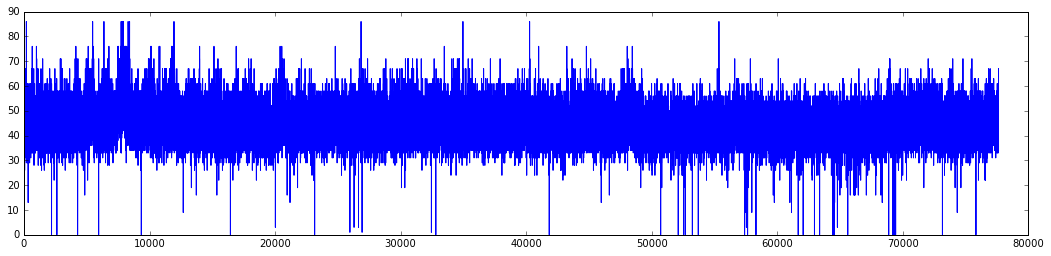

In [216]:
plt.figure(figsize=(18, 4))
plt.plot(y['PUNT_MATEMATICAS'])

About that figure ploted above, i can see that the behavior of the target is so chaotic and is dificult to predict with a simple Linear Regression.